# Lektion 8

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Matrixplots

In [2]:
i = Symbol('i')
j = Symbol('j')

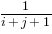

In [3]:
def hilbert_element(i,j):
    return 1/(i+j+1)

hilbert_element(i,j)

In [4]:
hilbert = Matrix(20, 20, hilbert_element)

TypeError: Image data can not convert to float

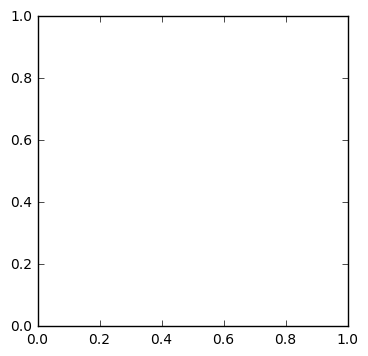

In [5]:
plt.imshow(hilbert)  # TypeError

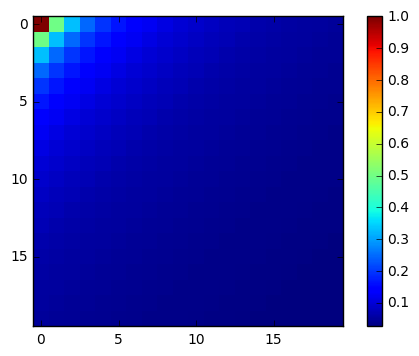

In [10]:
plt.imshow(np.array(hilbert).astype(float), interpolation='none')
plt.colorbar();

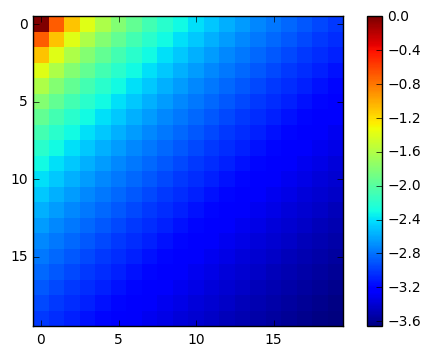

In [11]:
plt.imshow(np.log(np.array(hilbert).astype(float)), 
           interpolation='none')
plt.colorbar();

In [12]:
hilbert = Matrix(60, 60, hilbert_element)

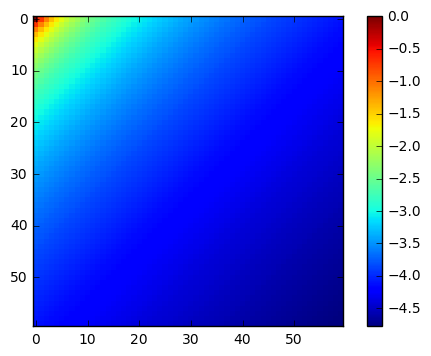

In [13]:
plt.imshow(np.log(np.array(hilbert).astype(float)), 
           interpolation='none')
plt.colorbar();

In [14]:
inv_hilbert = hilbert**(-1)

C:\Users\braun\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


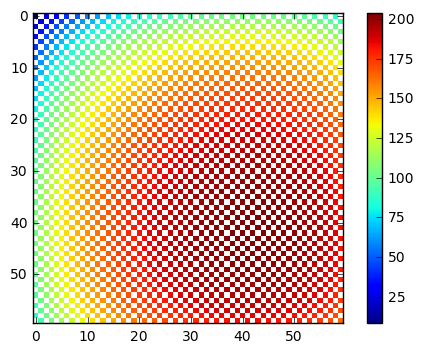

In [15]:
plt.imshow(np.log(np.array(inv_hilbert).astype(float)), 
           interpolation='none')
plt.colorbar();

Was ist das Problem?

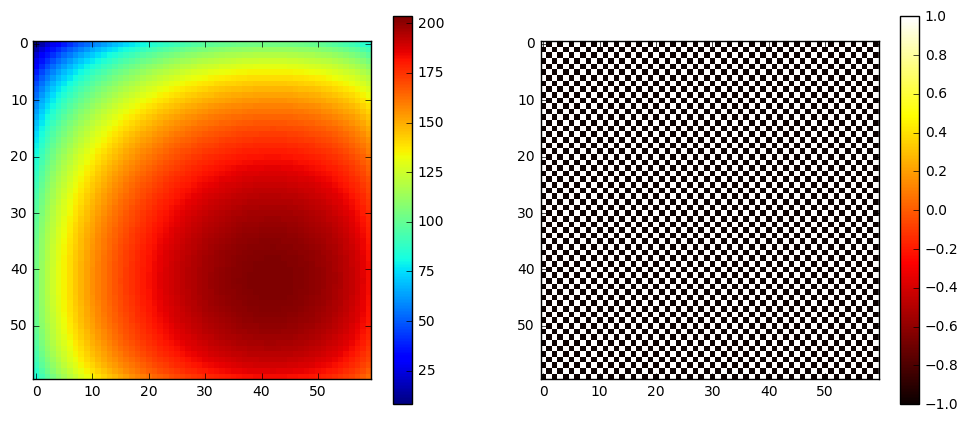

In [17]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(121)
plt.imshow(np.log(abs(np.array(inv_hilbert).astype(float))), 
           interpolation='none')
plt.colorbar()
fig.add_subplot(122)
plt.imshow(np.sign(np.array(inv_hilbert).astype(float)), 
           interpolation='none', cmap=plt.cm.hot)
plt.colorbar();

Als Ersatz für 3D-Plot:

In [18]:
x = Symbol('x')
y = Symbol('y')
f = cos(sqrt(x**2+y**2))
fn = lambdify((x,y), f, 'numpy')

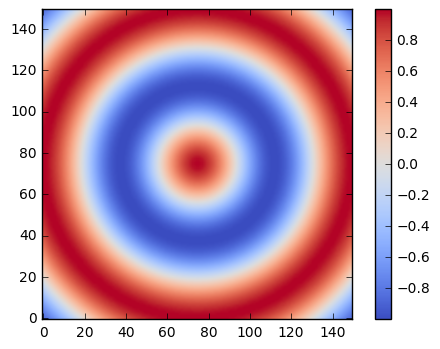

In [19]:
x = np.linspace(-2*np.pi, 2*np.pi, 150)
y = x
X, Y = np.meshgrid(x, y)
W = fn(X, Y)
plt.imshow(W, origin='lower', cmap=plt.cm.coolwarm)
plt.colorbar();

In [20]:
extent = (x[0], x[-1], y[0], y[-1])
extent

In [21]:
W[W<0] = -W[W<0]  # abs(W) wäre einfacher

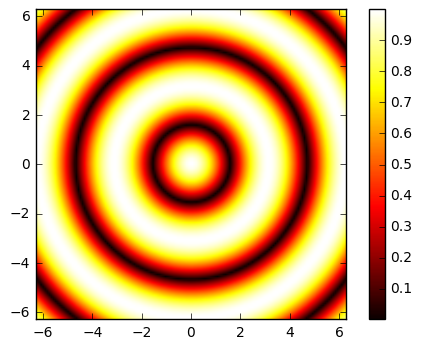

In [22]:
plt.imshow(W, origin='lower', cmap=plt.cm.hot, extent=extent)
plt.colorbar();

## Lineare Gleichungssysteme

In [23]:
A = Matrix(3, 3, range(1,10))
A

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [24]:
b = Matrix([6, 15, 24])
b

⎡6 ⎤
⎢  ⎥
⎢15⎥
⎢  ⎥
⎣24⎦

Wir wollen $Ax=b$ lösen.

In [25]:
x = Matrix([Symbol('x_'+str(j)) for j in [1,2,3]])
x

⎡x₁⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎣x₃⎦

In [26]:
glg = Eq(A*x, b)
glg

⎡ x₁ + 2⋅x₂ + 3⋅x₃ ⎤ = ⎡6 ⎤
⎢                  ⎥   ⎢  ⎥
⎢4⋅x₁ + 5⋅x₂ + 6⋅x₃⎥   ⎢15⎥
⎢                  ⎥   ⎢  ⎥
⎣7⋅x₁ + 8⋅x₂ + 9⋅x₃⎦   ⎣24⎦

In [27]:
Lsg = solve(glg)
Lsg

Probe:

In [28]:
glg.subs(Lsg[0])

konkrete Lösung

In [31]:
x.subs(Lsg[0]).subs(x[2], 0)

⎡0⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣0⎦

andere konkrete Lösung

In [32]:
x.subs(Lsg[0]).subs(x[2], 1)

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

In [33]:
solve(A*x, x)  # Kern von A

In [34]:
solve(A*x, Matrix([0,0,1]))  # unlösbar

## Veränderliche und unveränderliche Matrizen

In [35]:
B = A

In [36]:
B[0,0] = 999
B

⎡999  2  3⎤
⎢         ⎥
⎢ 4   5  6⎥
⎢         ⎥
⎣ 7   8  9⎦

In [37]:
A

⎡999  2  3⎤
⎢         ⎥
⎢ 4   5  6⎥
⎢         ⎥
⎣ 7   8  9⎦

In [38]:
B = A.copy()
B[0,0] = 777
B

⎡777  2  3⎤
⎢         ⎥
⎢ 4   5  6⎥
⎢         ⎥
⎣ 7   8  9⎦

In [39]:
A

⎡999  2  3⎤
⎢         ⎥
⎢ 4   5  6⎥
⎢         ⎥
⎣ 7   8  9⎦

In [41]:
C = A[0:3, 0:3]
C

⎡999  2  3⎤
⎢         ⎥
⎢ 4   5  6⎥
⎢         ⎥
⎣ 7   8  9⎦

In [42]:
C[1,1] = 555
C

⎡999   2   3⎤
⎢           ⎥
⎢ 4   555  6⎥
⎢           ⎥
⎣ 7    8   9⎦

In [43]:
A

⎡999  2  3⎤
⎢         ⎥
⎢ 4   5  6⎥
⎢         ⎥
⎣ 7   8  9⎦

In [44]:
type(A)

sympy.matrices.dense.MutableDenseMatrix

In [45]:
Ai = simplify(A)
type(Ai)

sympy.matrices.immutable.ImmutableMatrix

In [46]:
Ai[0,0] = 3 # TypeError

TypeError: Cannot set values of ImmutableMatrix

In [49]:
B = Matrix(Ai)
B[0,0] = 333
A, B

⎛⎡999  2  3⎤, ⎡333  2  3⎤⎞
⎜⎢         ⎥  ⎢         ⎥⎟
⎜⎢ 4   5  6⎥  ⎢ 4   5  6⎥⎟
⎜⎢         ⎥  ⎢         ⎥⎟
⎝⎣ 7   8  9⎦  ⎣ 7   8  9⎦⎠

In [51]:
type(Matrix(B))

sympy.matrices.dense.MutableDenseMatrix

## Parameterabhängige Matrizen

In [52]:
a = Symbol('a')
A = Matrix(3,3,range(1,10))
A[0,0] = 1 + a
A

⎡a + 1  2  3⎤
⎢           ⎥
⎢  4    5  6⎥
⎢           ⎥
⎣  7    8  9⎦

In [53]:
glg = Eq(A*x, b)
glg

⎡x₁⋅(a + 1) + 2⋅x₂ + 3⋅x₃⎤ = ⎡6 ⎤
⎢                        ⎥   ⎢  ⎥
⎢   4⋅x₁ + 5⋅x₂ + 6⋅x₃   ⎥   ⎢15⎥
⎢                        ⎥   ⎢  ⎥
⎣   7⋅x₁ + 8⋅x₂ + 9⋅x₃   ⎦   ⎣24⎦

In [54]:
solve(glg, x)

In [55]:
glg = Eq(A*x, Matrix([0,0,1]))
glg

⎡x₁⋅(a + 1) + 2⋅x₂ + 3⋅x₃⎤ = ⎡0⎤
⎢                        ⎥   ⎢ ⎥
⎢   4⋅x₁ + 5⋅x₂ + 6⋅x₃   ⎥   ⎢0⎥
⎢                        ⎥   ⎢ ⎥
⎣   7⋅x₁ + 8⋅x₂ + 9⋅x₃   ⎦   ⎣1⎦

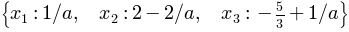

In [56]:
solve(glg, x)

In [57]:
A.det()

## Gauß-Elimination zu Fuß

In [58]:
L, U, R = A.LUdecomposition()
L, U, R

⎛⎡  1        0      0⎤, ⎡a + 1      2                       3                 
⎜⎢                   ⎥  ⎢                                                     
⎜⎢  4                ⎥  ⎢             8                       12              
⎜⎢─────      1      0⎥  ⎢  0    5 - ─────               6 - ─────             
⎜⎢a + 1              ⎥  ⎢           a + 1                   a + 1             
⎜⎢                   ⎥  ⎢                                                     
⎜⎢             14    ⎥  ⎢                              ⎛      12 ⎞ ⎛      14 ⎞
⎜⎢       8 - ─────   ⎥  ⎢                              ⎜6 - ─────⎟⋅⎜8 - ─────⎟
⎜⎢  7        a + 1   ⎥  ⎢                        21    ⎝    a + 1⎠ ⎝    a + 1⎠
⎜⎢─────  ─────────  1⎥  ⎢  0        0      9 - ───── - ───────────────────────
⎜⎢a + 1        8     ⎥  ⎢                      a + 1                8         
⎜⎢       5 - ─────   ⎥  ⎢                                     5 - ─────       
⎝⎣           a + 1   ⎦  ⎣                           

In [59]:
L*U == A  # aber nur, weil R=[]

True

In [65]:
A = Matrix(3,3,range(1,10))
A[0,0] = 1+a
b = Matrix([0,0,1])
A1 = A.row_join(b)
A1

⎡a + 1  2  3  0⎤
⎢              ⎥
⎢  4    5  6  0⎥
⎢              ⎥
⎣  7    8  9  1⎦

In [66]:
def func1(b, j):
    return b/A1[0,0]
A1.row_op(0, func1)
A1

⎡     2      3     ⎤
⎢1  ─────  ─────  0⎥
⎢   a + 1  a + 1   ⎥
⎢                  ⎥
⎢4    5      6    0⎥
⎢                  ⎥
⎣7    8      9    1⎦

In [67]:
def func2(b, j):
    return b - A[1,0]*A1[0,j]
A1.row_op(1, func2)
def func3(b, j):
    return b - A[2,0]*A1[0,j]
A1.row_op(2, func3)
A1

⎡       2          3       ⎤
⎢1    ─────      ─────    0⎥
⎢     a + 1      a + 1     ⎥
⎢                          ⎥
⎢         8          12    ⎥
⎢0  5 - ─────  6 - ─────  0⎥
⎢       a + 1      a + 1   ⎥
⎢                          ⎥
⎢         14         21    ⎥
⎢0  8 - ─────  9 - ─────  1⎥
⎣       a + 1      a + 1   ⎦

Das ist aber sehr fehleranfällig

In [68]:
def mult_zeile(A, zeilennr, faktor):
    B = Matrix(A)
    def func(b, j):
        return b*faktor
    B.row_op(zeilennr, func)
    return B

In [70]:
B = A.copy()
mult_zeile(B, 2, -3)

⎡a + 1   2    3 ⎤
⎢               ⎥
⎢  4     5    6 ⎥
⎢               ⎥
⎣ -21   -24  -27⎦

In [71]:
def add_zeile(A, quell_nr, ziel_nr, faktor):
    B = Matrix(A)  
    def func(b, j):
        return b + B[quell_nr,j]*faktor
    B.row_op(ziel_nr, func)
    return B

In [72]:
A1

⎡       2          3       ⎤
⎢1    ─────      ─────    0⎥
⎢     a + 1      a + 1     ⎥
⎢                          ⎥
⎢         8          12    ⎥
⎢0  5 - ─────  6 - ─────  0⎥
⎢       a + 1      a + 1   ⎥
⎢                          ⎥
⎢         14         21    ⎥
⎢0  8 - ─────  9 - ─────  1⎥
⎣       a + 1      a + 1   ⎦

In [73]:
A2 = mult_zeile(A1, 1, 1/A1[1,1])
A2

⎡       2          3       ⎤
⎢1    ─────      ─────    0⎥
⎢     a + 1      a + 1     ⎥
⎢                          ⎥
⎢                    12    ⎥
⎢              6 - ─────   ⎥
⎢                  a + 1   ⎥
⎢0      1      ─────────  0⎥
⎢                    8     ⎥
⎢              5 - ─────   ⎥
⎢                  a + 1   ⎥
⎢                          ⎥
⎢         14         21    ⎥
⎢0  8 - ─────  9 - ─────  1⎥
⎣       a + 1      a + 1   ⎦

In [74]:
A3 = add_zeile(A2, 1, 2, -A2[2,1])
A3 = simplify(A3)
A3

⎡     2        3       ⎤
⎢1  ─────    ─────    0⎥
⎢   a + 1    a + 1     ⎥
⎢                      ⎥
⎢          6⋅(a - 1)   ⎥
⎢0    1    ─────────  0⎥
⎢           5⋅a - 3    ⎥
⎢                      ⎥
⎢            -3⋅a      ⎥
⎢0    0     ───────   1⎥
⎣           5⋅a - 3    ⎦

In [75]:
A4 = mult_zeile(A3, 2, 1/A3[2,2])
A4

⎡     2        3                 ⎤
⎢1  ─────    ─────         0     ⎥
⎢   a + 1    a + 1               ⎥
⎢                                ⎥
⎢          6⋅(a - 1)             ⎥
⎢0    1    ─────────       0     ⎥
⎢           5⋅a - 3              ⎥
⎢                                ⎥
⎢                     -(5⋅a - 3) ⎥
⎢0    0        1      ───────────⎥
⎣                         3⋅a    ⎦

In [76]:
A5 = add_zeile(A4, 2, 1, -A4[1,2])
A5

⎡     2      3               ⎤
⎢1  ─────  ─────       0     ⎥
⎢   a + 1  a + 1             ⎥
⎢                            ⎥
⎢                  2⋅(a - 1) ⎥
⎢0    1      0     ───────── ⎥
⎢                      a     ⎥
⎢                            ⎥
⎢                 -(5⋅a - 3) ⎥
⎢0    0      1    ───────────⎥
⎣                     3⋅a    ⎦

In [77]:
A6 = add_zeile(A5, 1, 0, -A5[0,1])
A7 = add_zeile(A6, 2, 0, -A6[0,2])
A7

⎡           4⋅(a - 1)    5⋅a - 3 ⎤
⎢1  0  0  - ───────── + ─────────⎥
⎢           a⋅(a + 1)   a⋅(a + 1)⎥
⎢                                ⎥
⎢                2⋅(a - 1)       ⎥
⎢0  1  0         ─────────       ⎥
⎢                    a           ⎥
⎢                                ⎥
⎢               -(5⋅a - 3)       ⎥
⎢0  0  1        ───────────      ⎥
⎣                   3⋅a          ⎦

In [78]:
y = simplify(A7[0:3, 3])
y

⎡   1   ⎤
⎢   ─   ⎥
⎢   a   ⎥
⎢       ⎥
⎢     2 ⎥
⎢ 2 - ─ ⎥
⎢     a ⎥
⎢       ⎥
⎢  5   1⎥
⎢- ─ + ─⎥
⎣  3   a⎦

In [79]:
simplify(A*y) == b

True

## Eigenwerte

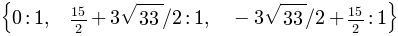

In [80]:
A = Matrix(3, 3, range(1,10))
A.eigenvals()

In [81]:
A.eigenvects()

⎡                ⎛               ⎡⎡      ⎛       12         ⎞                 
⎢                ⎜               ⎢⎢    2⋅⎜- ──────────── + 6⎟                 
⎢                ⎜               ⎢⎢      ⎜    3⋅√33   13    ⎟                 
⎢                ⎜               ⎢⎢      ⎜  - ───── - ──    ⎟                 
⎢                ⎜15   3⋅√33     ⎢⎢      ⎝      2     2     ⎠           3     
⎢⎛0, 1, ⎡⎡1 ⎤⎤⎞, ⎜── + ─────, 1, ⎢⎢───────────────────────────── - ───────────
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜2      2       ⎢⎢⎛  3⋅√33   13⎞ ⎛  9⋅√33   33⎞     3⋅√33   1
⎢⎜      ⎢⎢-2⎥⎥⎟  ⎜               ⎢⎢⎜- ───── - ──⎟⋅⎜- ───── - ──⎟   - ───── - ─
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜               ⎢⎢⎝    2     2 ⎠ ⎝    8     8 ⎠       2     2
⎢⎝      ⎣⎣1 ⎦⎦⎠  ⎜               ⎢⎢                                           
⎢                ⎜               ⎢⎢            ⎛       12         ⎞           
⎢                ⎜               ⎢⎢           -⎜- ──────────── + 6⎟           
⎢                ⎜               ⎢⎢            ⎜    

In [82]:
A.eigenvects(simplify=True)

⎡                ⎛               ⎡⎡      ⎛    4         ⎞                ⎤⎤⎞  
⎢                ⎜               ⎢⎢   64⋅⎜────────── + 1⎟                ⎥⎥⎟  
⎢                ⎜15   3⋅√33     ⎢⎢      ⎝13 + 3⋅√33    ⎠          6     ⎥⎥⎟  
⎢⎛0, 1, ⎡⎡1 ⎤⎤⎞, ⎜── + ─────, 1, ⎢⎢───────────────────────── + ──────────⎥⎥⎟, 
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜2      2       ⎢⎢(11 + 3⋅√33)⋅(13 + 3⋅√33)   13 + 3⋅√33⎥⎥⎟  
⎢⎜      ⎢⎢-2⎥⎥⎟  ⎜               ⎢⎢                                      ⎥⎥⎟  
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜               ⎢⎢            ⎛    4         ⎞          ⎥⎥⎟  
⎢⎝      ⎣⎣1 ⎦⎦⎠  ⎜               ⎢⎢         16⋅⎜────────── + 1⎟          ⎥⎥⎟  
⎢                ⎜               ⎢⎢            ⎝13 + 3⋅√33    ⎠          ⎥⎥⎟  
⎢                ⎜               ⎢⎢         ───────────────────          ⎥⎥⎟  
⎢                ⎜               ⎢⎢              11 + 3⋅√33              ⎥⎥⎟  
⎢                ⎜               ⎢⎢                                      ⎥⎥⎟  
⎣                ⎝               ⎣⎣                 

In [83]:
T, J = A.diagonalize()
T = simplify(T)
T, J

⎛⎡      1   3⋅√33    3⋅√33   1⎤                               ⎞
⎜⎢1   - ─ + ─────  - ───── - ─⎥, ⎡0      0            0      ⎤⎟
⎜⎢      2     22       22    2⎥  ⎢                           ⎥⎟
⎜⎢                            ⎥  ⎢   15   3⋅√33              ⎥⎟
⎜⎢     1   3⋅√33     3⋅√33   1⎥  ⎢0  ── + ─────       0      ⎥⎟
⎜⎢-2   ─ + ─────   - ───── + ─⎥  ⎢   2      2                ⎥⎟
⎜⎢     4     44        44    4⎥  ⎢                           ⎥⎟
⎜⎢                            ⎥  ⎢                 3⋅√33   15⎥⎟
⎜⎣1        1            1     ⎦  ⎢0      0       - ───── + ──⎥⎟
⎝                                ⎣                   2     2 ⎦⎠

In [84]:
simplify(T * J * T**(-1))

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

In [ ]:
B = Matrix(3, 3, [1,1,0,0,1,0,0,0,1])
B

In [ ]:
B.eigenvects()

In [ ]:
#B.diagonalize()   # MatrixError

In [ ]:
C = simplify(T**(-1)*B*T)
C

In [ ]:
T1, J = C.jordan_form()
J

In [ ]:
T1[0,0]

In [ ]:
T1 = simplify(T1)

In [ ]:
T1[0,0]

In [ ]:
simplify(T1 * J * T1**(-1) - C)

In [ ]:
Cn = np.array(C).astype(float)

In [ ]:
eigw, eigv = np.linalg.eig(Cn)
eigw

In [ ]:
eigv

In [ ]:
M = Matrix(eigv)
M.det()

Hier könnte man eine Aufgabe von machen